# **Clasificador de Frutas con CNN**

1. Preparar el entorno y descargar el dataset

In [8]:
import os
import shutil


kaggle_dir = os.path.join(os.path.expanduser("~"), ".kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

shutil.copy("kaggle.json", os.path.join(kaggle_dir, "kaggle.json"))


'C:\\Users\\gerar\\.kaggle\\kaggle.json'

In [9]:
!pip install kaggle

  Using cached kaggle-1.7.4.5-py3-none-any.whl.metadata (16 kB)
Using cached kaggle-1.7.4.5-py3-none-any.whl (181 kB)

   ---------- ----------------------------- 1/4 [tqdm]
   ---------- ----------------------------- 1/4 [tqdm]
   ---------- ----------------------------- 1/4 [tqdm]
   ---------- ----------------------------- 1/4 [tqdm]
   -------------------- ------------------- 2/4 [python-slugify]
   ------------------------------ --------- 3/4 [kaggle]
   ------------------------------ --------- 3/4 [kaggle]
   ------------------------------ --------- 3/4 [kaggle]
   ------------------------------ --------- 3/4 [kaggle]
   ------------------------------ --------- 3/4 [kaggle]
   ------------------------------ --------- 3/4 [kaggle]
   ------------------------------ --------- 3/4 [kaggle]
   ------------------------------ --------- 3/4 [kaggle]
   ------------------------------ --------- 3/4 [kaggle]
   ---------------------------------------- 4/4 [kaggle]



In [ ]:
!kaggle datasets download -d moltean/fruits

In [32]:
import zipfile
import os


os.makedirs("fruits", exist_ok=True)


with zipfile.ZipFile("fruits.zip", 'r') as zip_ref:
    zip_ref.extractall("fruits")

print("Dataset descomprimido en carpeta 'fruits'")


Dataset descomprimido en carpeta 'fruits'


2. Cargar y preparar los datos con ImageDataGenerator

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [33]:
train_dir = 'fruits/fruits-360_100x100/fruits-360/Training'
test_dir = 'fruits/fruits-360_100x100/fruits-360/Test'

In [34]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [35]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 83260 images belonging to 206 classes.
Found 20733 images belonging to 206 classes.


3. Definir la CNN

In [5]:
from tensorflow.keras import layers, models

In [36]:
num_classes = train_generator.num_classes
print(f"Número de clases detectadas: {num_classes}")

Número de clases detectadas: 206


In [37]:
model = models.Sequential([
    # Primera sección de convolución
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Segunda sección de convolución
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Clasificación
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [38]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 96, 96, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 44, 44, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     7,930,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 206)            │        52,942 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,048,622 (30.70 MB)

 Trainable params: 8,048,622 (30.70 MB)

 Non-trainable params: 0 (0.00 B)

4. Entrenamiento del Modelo CNN

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

In [22]:
model.save('modelo_frutas.keras')

In [24]:
import json

with open('historial_entrenamiento.json', 'w') as f:
    json.dump(history.history, f)

In [40]:
from tensorflow.keras.models import load_model

model = load_model('modelo_frutas.keras')

In [41]:
import json

with open('historial_entrenamiento.json', 'r') as f:
    history_dict = json.load(f)


5. Visulizacion de Metricas de entrenamiento

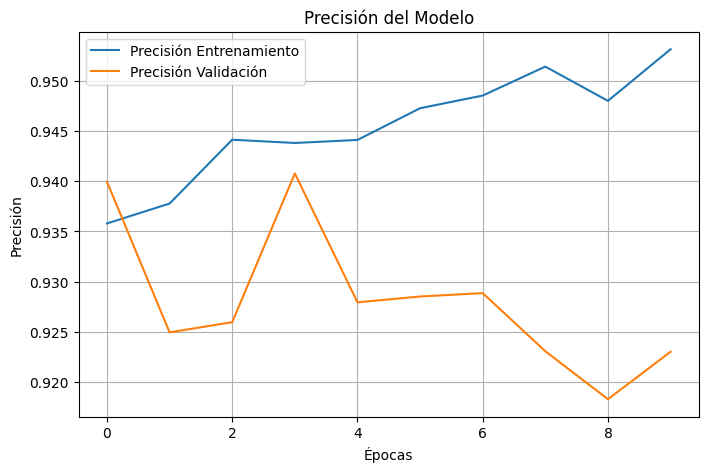

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history_dict['accuracy'], label='Precisión Entrenamiento')
plt.plot(history_dict['val_accuracy'], label='Precisión Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

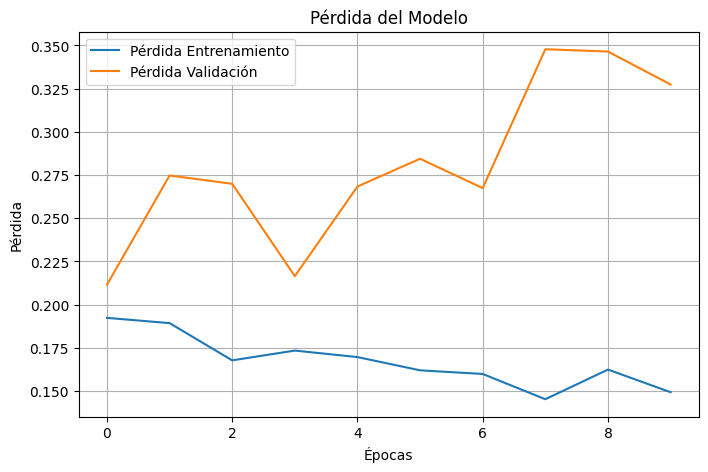

In [43]:
plt.figure(figsize=(8,5))
plt.plot(history_dict['loss'], label='Pérdida Entrenamiento')
plt.plot(history_dict['val_loss'], label='Pérdida Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

6. Evaluar el modelo con el conjunto de prueba

In [44]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'fruits/fruits-360_100x100/fruits-360/Test',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  
)

Found 34711 images belonging to 206 classes.


In [45]:
print("Clases en entrenamiento:", train_generator.num_classes)
print("Clases en test:", test_generator.num_classes)
print("Clases del modelo (output):", model.output_shape[-1])
print("Clases detectadas en train:", train_generator.class_indices)
print("Clases detectadas en test:", test_generator.class_indices)

Clases en entrenamiento: 206
Clases en test: 206
Clases del modelo (output): 206
Clases detectadas en train: {'Apple 10': 0, 'Apple 11': 1, 'Apple 12': 2, 'Apple 13': 3, 'Apple 14': 4, 'Apple 17': 5, 'Apple 18': 6, 'Apple 19': 7, 'Apple 5': 8, 'Apple 6': 9, 'Apple 7': 10, 'Apple 8': 11, 'Apple 9': 12, 'Apple Braeburn 1': 13, 'Apple Core 1': 14, 'Apple Crimson Snow 1': 15, 'Apple Golden 1': 16, 'Apple Golden 2': 17, 'Apple Golden 3': 18, 'Apple Granny Smith 1': 19, 'Apple Pink Lady 1': 20, 'Apple Red 1': 21, 'Apple Red 2': 22, 'Apple Red 3': 23, 'Apple Red Delicious 1': 24, 'Apple Red Yellow 1': 25, 'Apple Red Yellow 2': 26, 'Apple Rotten 1': 27, 'Apple hit 1': 28, 'Apple worm 1': 29, 'Apricot 1': 30, 'Avocado 1': 31, 'Avocado Black 1': 32, 'Avocado Green 1': 33, 'Avocado ripe 1': 34, 'Banana 1': 35, 'Banana 3': 36, 'Banana 4': 37, 'Banana Lady Finger 1': 38, 'Banana Red 1': 39, 'Beans 1': 40, 'Beetroot 1': 41, 'Blackberrie 1': 42, 'Blackberrie 2': 43, 'Blackberrie half rippen 1': 44, '

In [46]:
test_loss, test_acc = model.evaluate(test_generator)
print(f' Precisión en el conjunto de prueba: {test_acc:.4f}')
print(f' Pérdida en el conjunto de prueba: {test_loss:.4f}')

1085/1085 ━━━━━━━━━━━━━━━━━━━━ 862s 793ms/step - accuracy: 0.9522 - loss: 0.2241
 Precisión en el conjunto de prueba: 0.9543
 Pérdida en el conjunto de prueba: 0.2000


7. Predecir una imagen individual

In [50]:
import ipywidgets as widgets
from IPython.display import display
import io
import numpy as np
from tensorflow.keras.preprocessing import image

uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)

def get_img_array(uploader):
    if not uploader.value:
        raise ValueError("Por favor, sube una imagen.")
    files = uploader.value
    if isinstance(files, dict):
        files = list(files.values())
    file_info = files[0]
    img_bytes = io.BytesIO(file_info['content'])
    img = image.load_img(img_bytes, target_size=(100, 100))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img, img_array

FileUpload(value=(), accept='image/*', description='Upload')

In [69]:
try:
    img, img_array = get_img_array(uploader)
    print("Imagen cargada correctamente.")
except Exception as e:
    print("Aún no has subido una imagen o hubo un error:", e)

Imagen cargada correctamente.


In [70]:
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
class_labels = list(train_generator.class_indices.keys())

print(f'Clase predicha: {class_labels[predicted_class]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Clase predicha: Banana Lady Finger 1


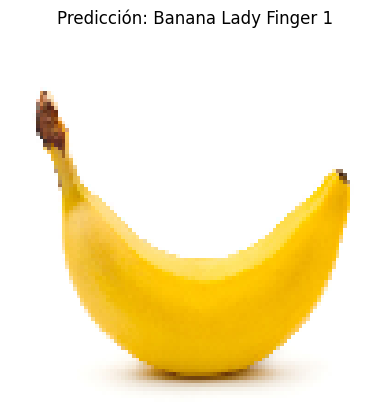

In [71]:
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicción: {class_labels[predicted_class]}')
plt.show()